<a href="https://colab.research.google.com/github/rumijay/Data-Science-2025/blob/main/Rumi_Unit6Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Project: Making a Generalized Linear Model (multiple predictors)

**Task**:

Two parts:

1. Propose a data set that's compatible with a generilized linear model structure built with pymc and/or bambi. Your data must have more than three potential predictor variables. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a generalized linear model using pymc within the colab environment, on a data set of your choice, with the following conditions:
  - your final model must have more than 2 predictors. The intercept term doesn't count as a predictor here (even though technically it is).
  - You must document and explain your model selection method. This means you must show that your likelihood/link function combo is better than at least one other choice of likelihood/link function.
  - You must document and explain your variable selection method. This means you must show that your final model is better than at least one other version of the model with a different selection of variables.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Choose a data set with lots of columns, and lots of potential interactions between variables. It'll be more fun, and will make model/variable selection more relevant.

- Linear models are generalized linear models. This is not a competition to come up with the most complicated hierearchical glm. Find a data set that interests you, and apply the simplest model that captures the patterns in the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit6NotesAK *is* your example! Specifically, try to do something akin to using more of the columns in the basketball data to predict FG%. You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

Context: I've chosen a data set about college admissions. It consists of GPA, SAT scores, and # of extracurricular activities. The admission outcomes are waitlisted, rejected, and accepted. My posteriors are

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amanace/student-admission-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.71k/1.71k [00:00<00:00, 2.58MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/amanace/student-admission-dataset/versions/1


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GPA                         250 non-null    float64
 1   SAT_Score                   250 non-null    int64  
 2   Extracurricular_Activities  250 non-null    int64  
 3   Admission_Status            250 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB


,GPA,SAT_Score,Extracurricular_Activities
count,250.000000,250.000000,250.000000
mean,3.238320,1250.432000,5.204000
std,0.438607,204.733163,2.964716
min,2.500000,900.000000,0.000000
25%,2.850000,1080.250000,3.000000
50%,3.230000,1237.000000,5.000000
75%,3.590000,1426.000000,7.750000
max,4.000000,1598.000000,10.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(path + "/student_admission_dataset.csv")
df.head()


,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted


In [ ]:
!pip install bambi pymc arviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 11.2 MB/s eta 0:00:00


In [ ]:

import bambi as bmb

model_admit = bmb.Model(
    "Admission_Status ~ GPA + SAT_Score + Extracurricular_Activities",
    df,
    family="categorical"
)


In [ ]:
idata_admit = model_admit.fit()


Output()

In [ ]:
model_gaussian = bmb.Model(
    "GPA ~ SAT_Score + Extracurricular_Activities",
    df,
    family="gaussian"
)

idata_gaussian = model_gaussian.fit(
    draws=2000,
    tune=1000,
    target_accept=0.9
)

Output()

In [ ]:
bmb.interpret.plot_predictions(model_admit,
                               idata_admit,
                               "GPA",
                               group_by="Extracurricular_Activities",
                               predictor_values={"Extracurricular_Activities": [0, 5, 10]},
                               fig_kwargs={"figsize":(20, 7)})

TypeError: plot_predictions() got an unexpected keyword argument 'group_by'

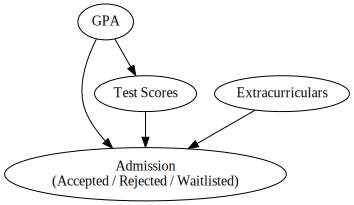

In [ ]:
import graphviz as gv

doc_dag = gv.Digraph(name="College Admission DAG")

doc_dag.node('A', 'Admission\n(Accepted / Rejected / Waitlisted)')

doc_dag.node('G', 'GPA')
doc_dag.node('S', 'Test Scores')
doc_dag.node('E', 'Extracurriculars')

doc_dag.edges(['GA', 'SA', 'EA', 'GS', ])

doc_dag